# Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn import set_config

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import ClusterCentroids
from collections import Counter

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE as over_sample

print('_________________All Libraries Have Been Installed.__________________')

_________________All Libraries Have Been Installed.__________________


In [2]:
dataset = pd.read_csv('../data/raw/term-deposit-marketing-2020.csv')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [4]:
#shape of Dataset
dataset.shape

(40000, 14)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
#some basic stats for numerical columns in dataset
dataset.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
#some basic stats for categorical columns
dataset.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,y
count,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,12,3,4,2,2,2,3,11,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,no
freq,9383,24386,20993,39191,24031,33070,24914,13532,37104


## Analysis

-  day, Month - These columns will be droped as they provide no usefull information, however if year was also available we could engineer a new feature to tell how long ago last contact was made, and with duration of last contact provided, we might be able to deduce, if user might still be interested in offer.

-  age - Minimum age 19 years old and Maximum age is 95 years old.  Mean is nearly equal to Median, normal distribution expected!

-  y, target - looking at frequency of class 'no' (37,104), where total rows are 40,000, we can deduce dataset is highly imbalanced.


### Now we will check for any duplicated rows and any missing values in columns

In [8]:
#checking for null values
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [9]:
#Checking for dublicate values
dataset.duplicated().sum()

0

### Analysis
-  There are no missing values in columns or duplicate rows. 

# Exploratory Data Analysis

Text(0.5, 0.98, 'Visualizing Continuous Columns')

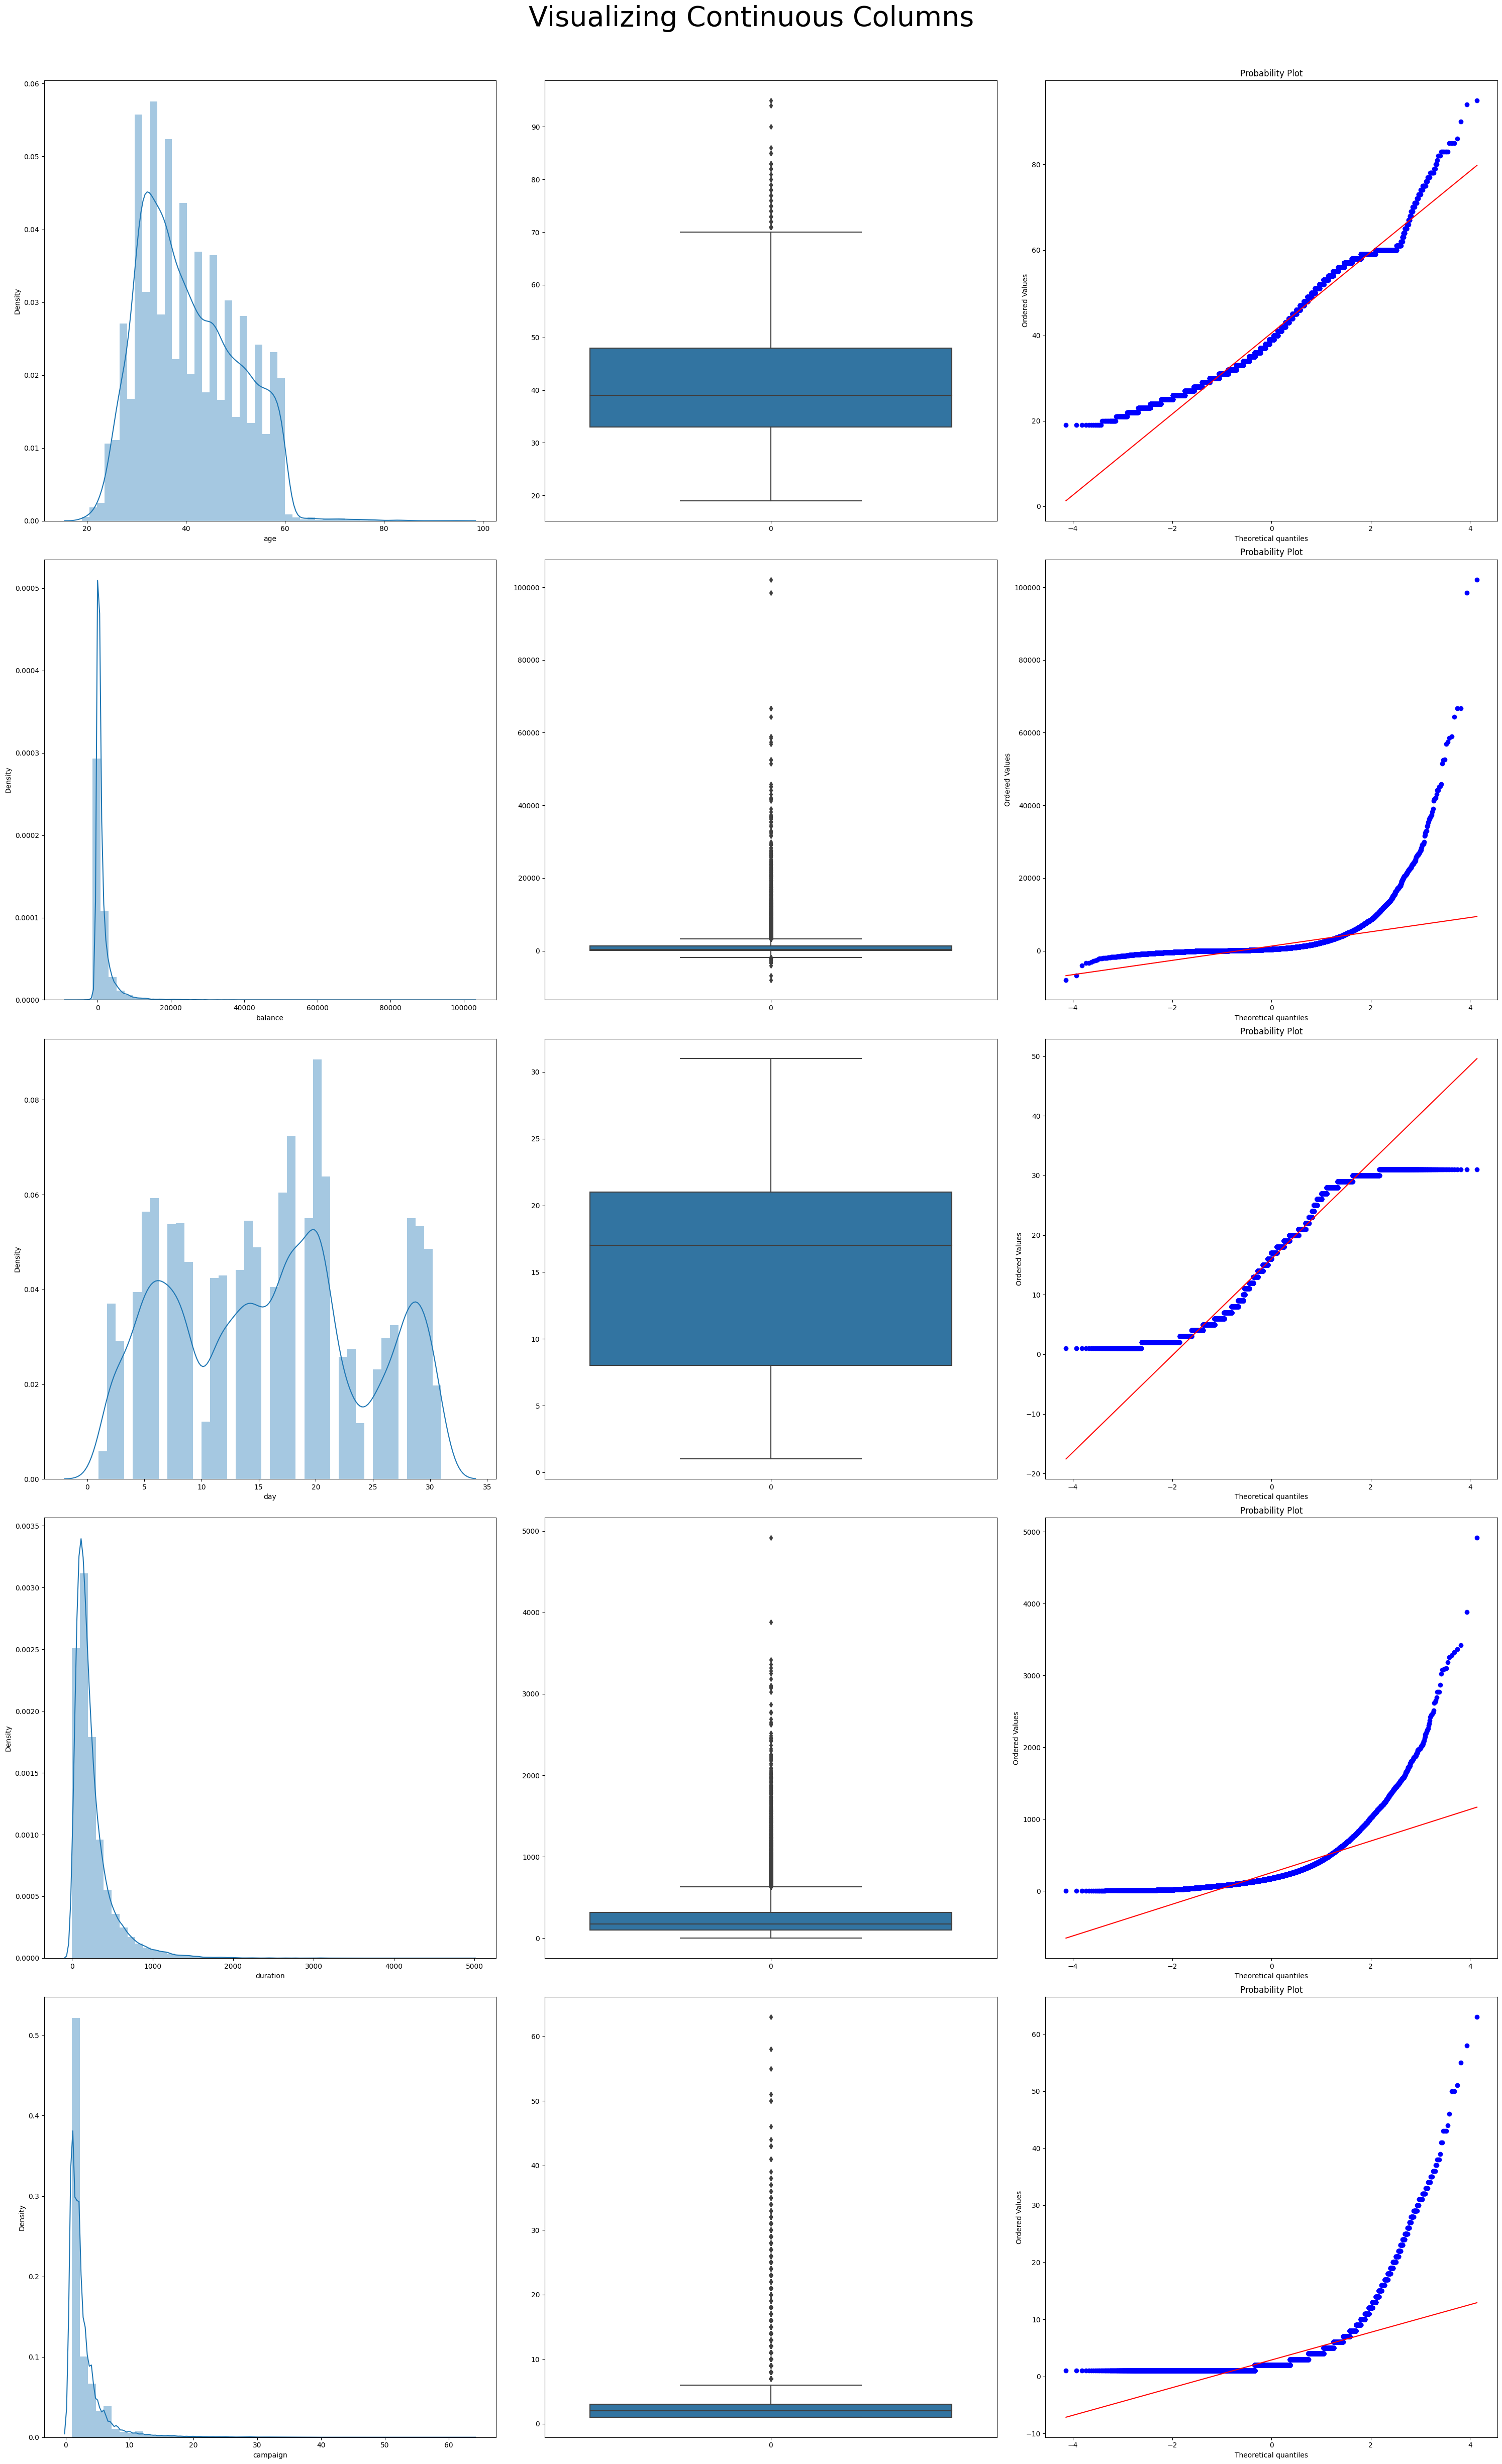

In [10]:
#Plotting for continous columns
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(5,3,figsize=(30,50))
for index,i in enumerate(dataset.iloc[:, [0, 5, 9, 11, 12]]):
    sns.distplot(dataset[i],ax=ax[index,0])
    sns.boxplot(dataset[i],ax=ax[index,1])
    stats.probplot(dataset[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=40)

Text(0.5, 0.98, 'Visualizing counts of Categorical Columns')

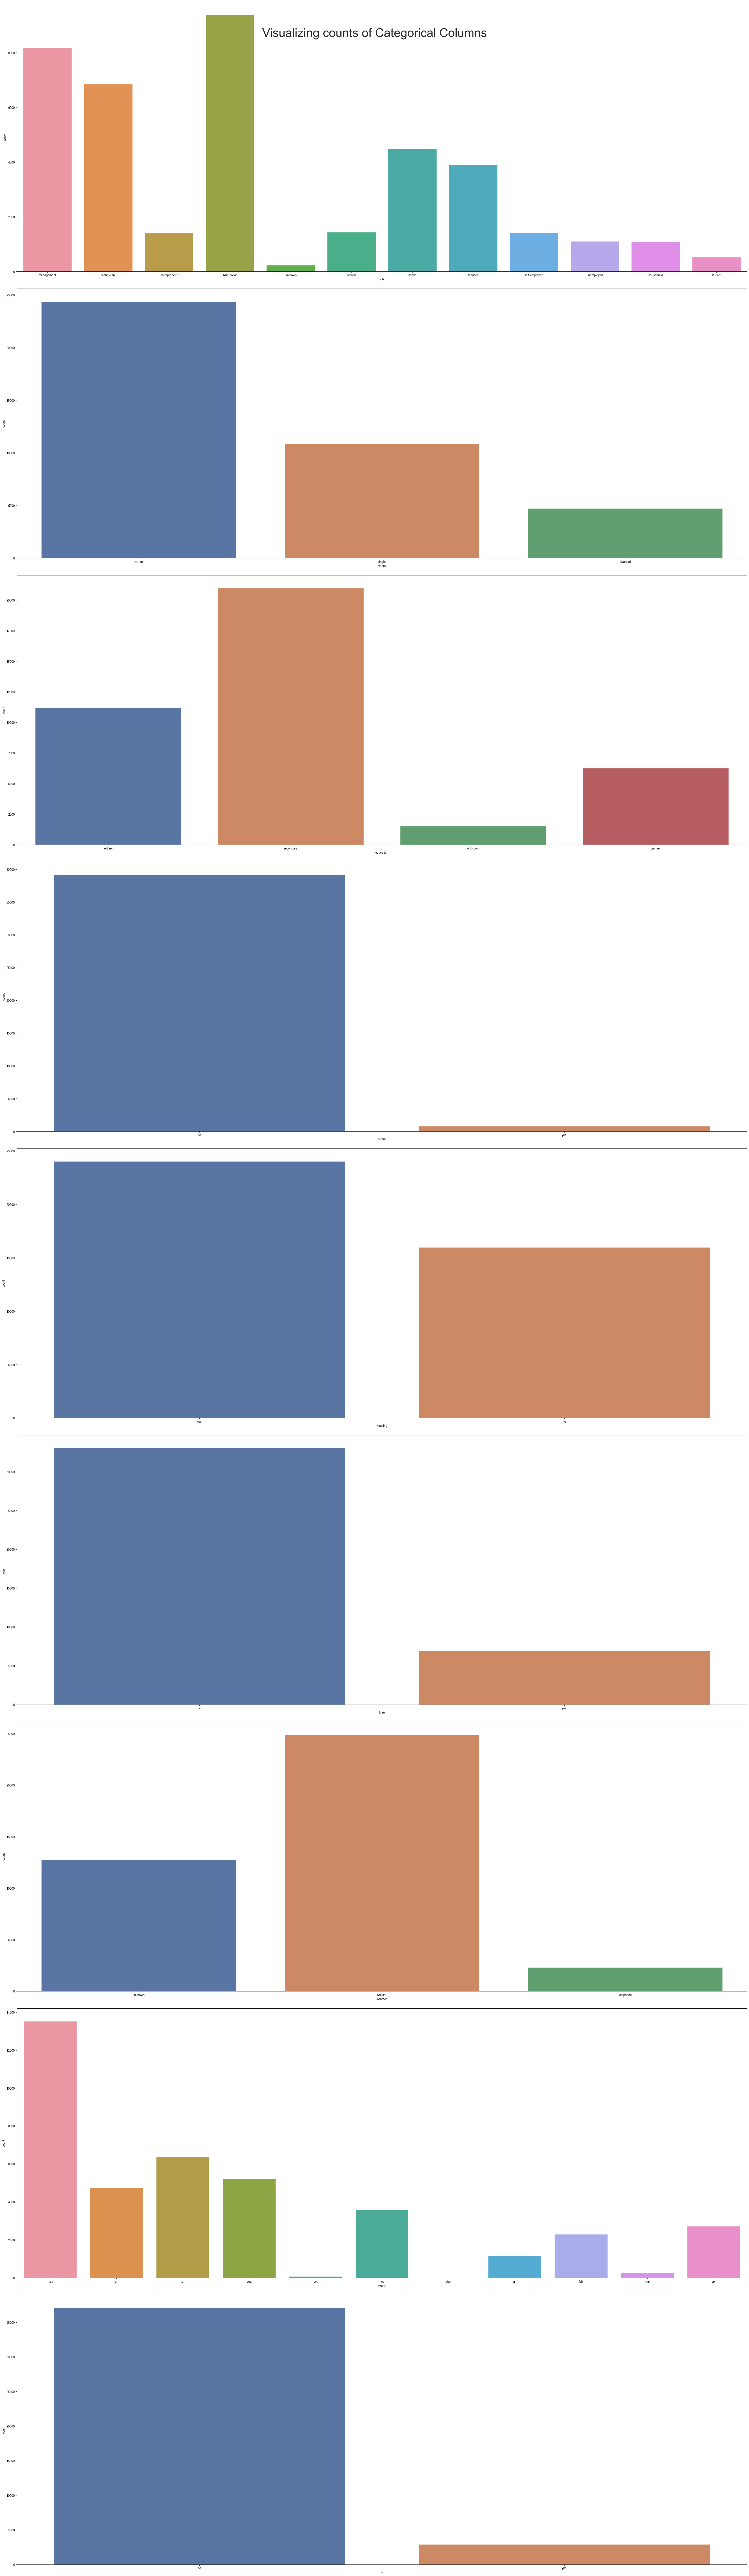

In [11]:
fig, axes =plt.subplots(9,1, figsize=(35,120), sharex=False)
axes = axes.flatten()
sns.set(font_scale=2)
columns=list(dataset.select_dtypes('object'))
for ax, catplot in zip(axes,columns):
    sns.countplot(data=dataset, x=catplot, ax=ax)

plt.tight_layout()  
fig.subplots_adjust(top=0.99)
plt.suptitle("Visualizing counts of Categorical Columns",fontsize=40)

Text(0.5, 0.98, 'Visualizing hitograms of categorical Columns')

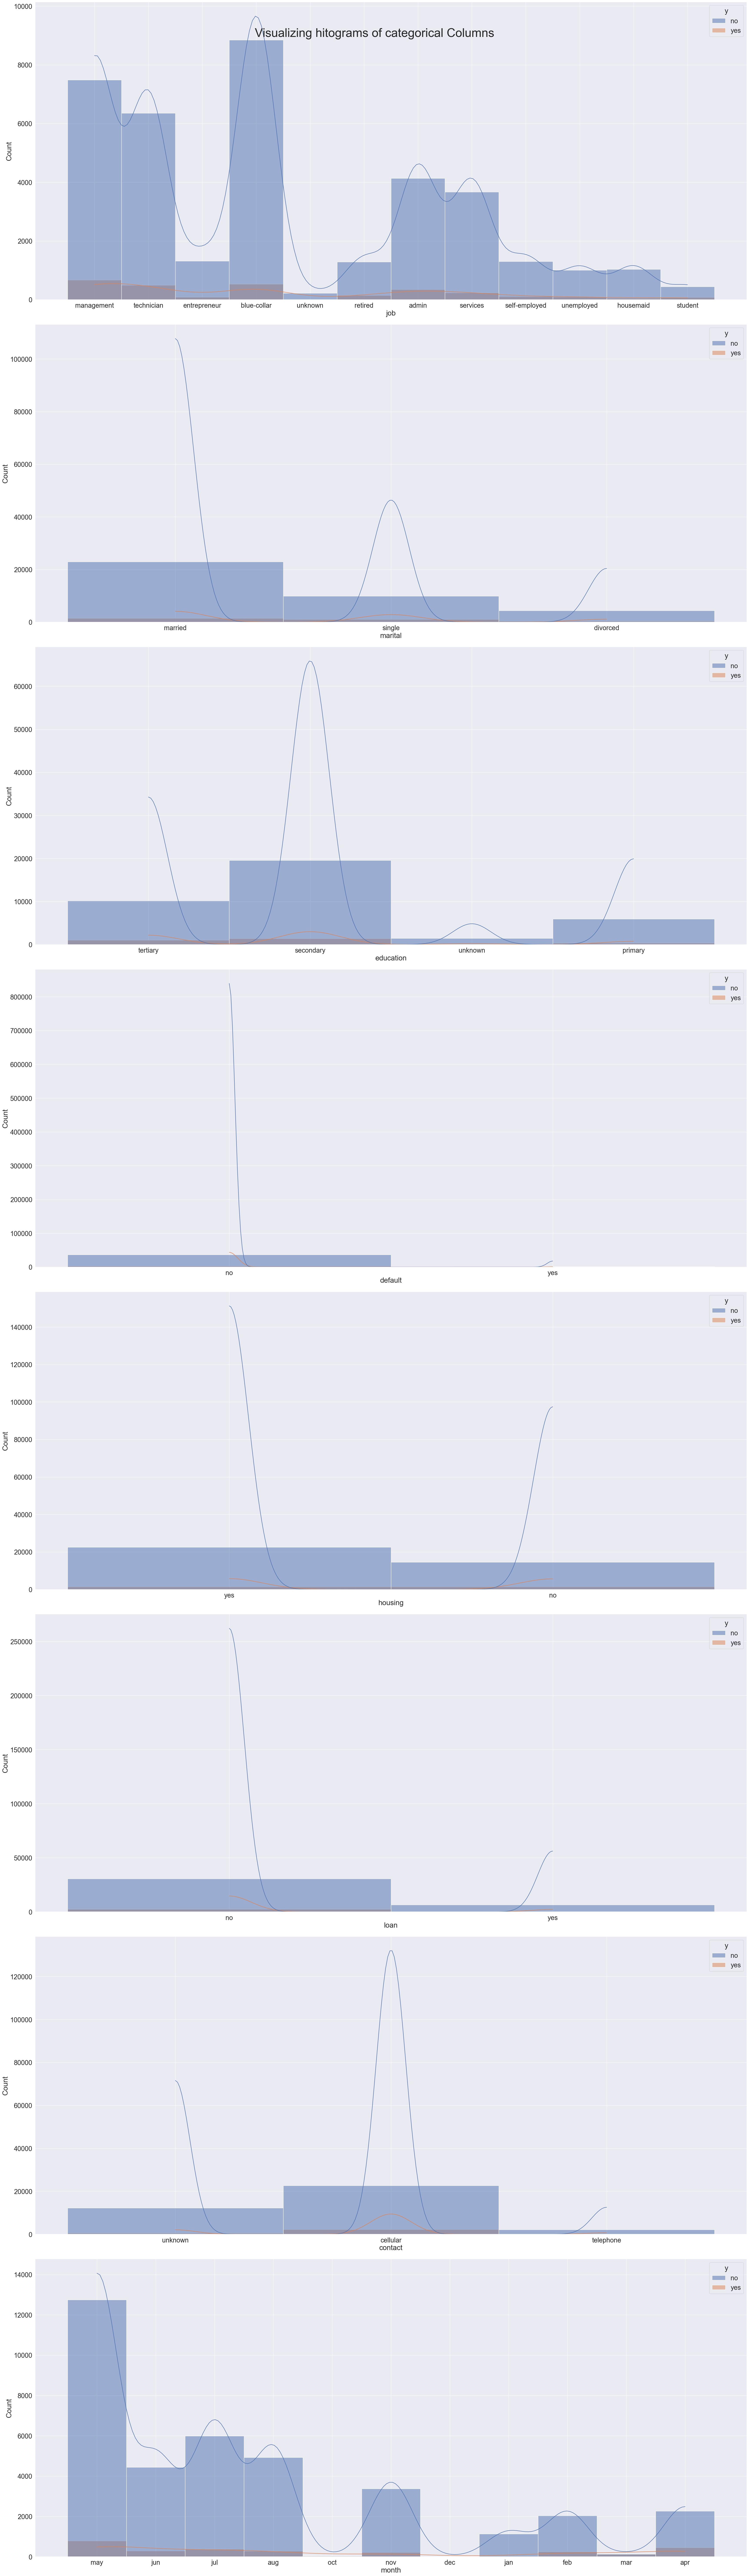

In [12]:
fig, axes =plt.subplots(8,1, figsize=(35,120), sharex=False)
axes = axes.flatten()
sns.set(font_scale=2)
columns=list(dataset.select_dtypes('object'))
columns.remove('y')
for ax, catplot in zip(axes,columns):
    sns.histplot(data=dataset,x=catplot,ax=ax,hue='y',kde=True)
plt.tight_layout()  
fig.subplots_adjust(top=0.99)
plt.suptitle("Visualizing hitograms of categorical Columns",fontsize=40)

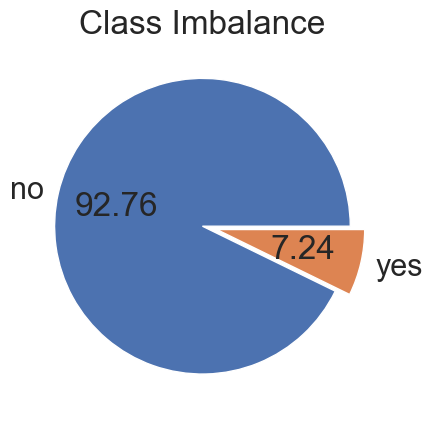

In [13]:
#Checking for dataset Imbalance (Slight imbalnce in dataset)
plt.pie(dataset['y'].value_counts(),labels=dataset['y'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

## Analysis
-  Dataset is highly skewed and outliers are present in the dataset as well.
-  Dataset is highly imbalanced.
-  undersampling should be done to balance the dataset.

In [14]:
print(f'Column Skewness\n{dataset.skew(axis=0).sort_values()}')

Column Skewness
day         0.067930
age         0.436080
duration    3.165307
campaign    4.730901
balance     8.259236
dtype: float64


## Preprocessing


Droping Day and month columns and saperating the dataset to training and target sets

In [15]:
#seperating X and y
X = dataset.drop(['day','month', 'y'],axis=1)
y = dataset['y']

encoding categorical data as well as target variable.

In [16]:
#Label Encoding the target variable
X = pd.get_dummies(X)
le = LabelEncoder()
y = le.fit_transform(y)

removing outliers using z score

In [17]:
#z = np.abs(stats.zscore(dataset.iloc[:, [0, 5, 9, 11, 12]]))
z = np.abs(stats.zscore(X))
#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
y_clean = y[(z<3).all(axis=1)]
#find how many rows are left in the dataframe 
X_clean.shape

(24405, 32)

Performing Undersampling to balance the dataset

In [18]:
sm2 = ClusterCentroids()
X_clean, y_clean = sm2.fit_resample(X_clean, y_clean)
print('Resampled dataset shape %s' % Counter(y_clean))

Resampled dataset shape Counter({0: 1500, 1: 1500})


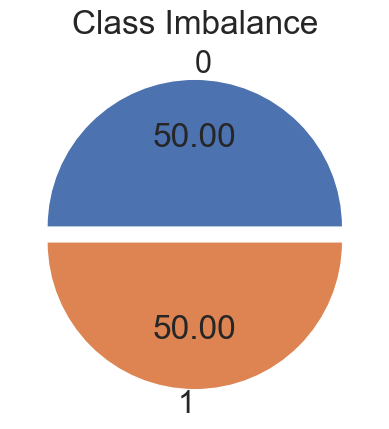

In [19]:
#Checking for dataset Imbalance (Slight imbalnce in dataset)
y_imb=pd.DataFrame(y_clean,columns=['y'])
y_imb.head()
plt.pie(y_imb['y'].value_counts(),labels=y_imb['y'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

train test split and data scaling for for model training

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,random_state=42)

In [21]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.fit_transform(X_test)

### Model Training with Cross Validation

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       385
           1       0.94      0.98      0.96       365

    accuracy                           0.96       750
   macro avg       0.96      0.96      0.96       750
weighted avg       0.96      0.96      0.96       750


Best Parameters of decistion tree model is : {'criterion': 'entropy', 'max_depth': 10}



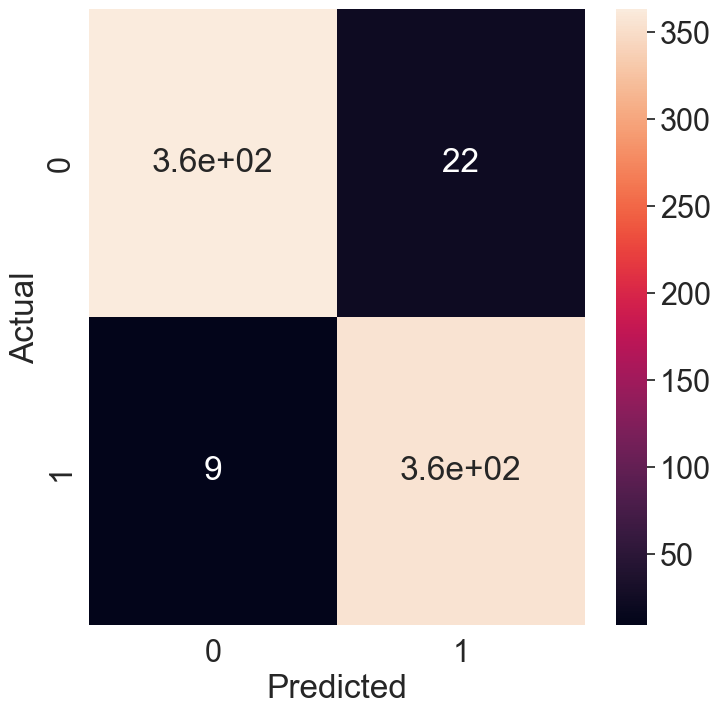

In [22]:
param_grid={ 'criterion':['gini', 'entropy'], 'max_depth':[2,4,6,8,10,12,14,16,18,20,22,24,26,28]}
dtc=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)
confusion_dtc=confusion_matrix(y_test,dtc.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_dtc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_dtc))
print(f'\nBest Parameters of decistion tree model is : {dtc.best_params_}\n')

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       385
           1       0.94      1.00      0.97       365

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750


Best Parameter: {'C': 10, 'max_iter': 50, 'solver': 'newton-cg'}



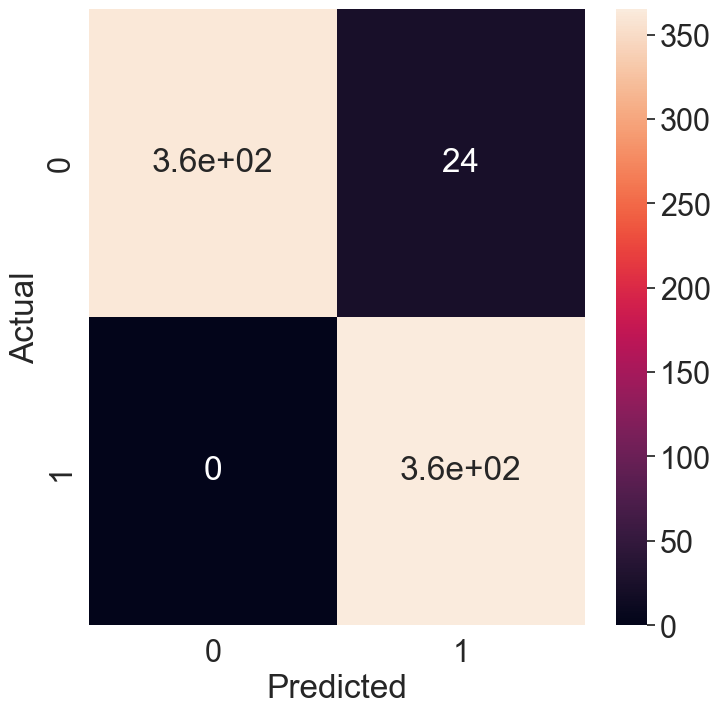

In [23]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'max_iter':[50,75,100,200,300,400,500,700],
    'solver': ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
}
log=GridSearchCV(LogisticRegression(),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
print(f'\nBest Parameter: {log.best_params_}\n')

## Model training with nested Cross validation

In [24]:
scaling = StandardScaler()
X_clean = scaling.fit_transform(X_clean)
XX_train = X_clean
YY_train = y_clean

In [25]:
# for GridsearchCV 
# define the model
dtc = DecisionTreeClassifier()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
#pca = decomposition.PCA()
#creating a pipeline
pipe = Pipeline(steps=[('dtc', dtc)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(dtc__criterion = criterion, dtc__max_depth = max_depth)

In [26]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>acc=0.927, est=0.957, cfg={'dtc__criterion': 'gini', 'dtc__max_depth': 10}
>acc=0.967, est=0.954, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 6}
>acc=0.960, est=0.954, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 8}
>acc=0.963, est=0.952, cfg={'dtc__criterion': 'gini', 'dtc__max_depth': 6}
>acc=0.950, est=0.957, cfg={'dtc__criterion': 'gini', 'dtc__max_depth': 6}
>acc=0.960, est=0.955, cfg={'dtc__criterion': 'gini', 'dtc__max_depth': 6}
>acc=0.970, est=0.954, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 6}
>acc=0.960, est=0.952, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 6}
>acc=0.957, est=0.955, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 6}
>acc=0.957, est=0.957, cfg={'dtc__criterion': 'entropy', 'dtc__max_depth': 6}
Accuracy: 0.957 (0.011)


In [27]:
# for GridsearchCV 
# define the model
log = LogisticRegression()
#for data scalling
std_slc = StandardScaler()
#for reducing the dimensions of the data
pca = decomposition.PCA()

#creating a pipeline
pipe = Pipeline(steps=[('log', log)])
#components used for pca
n_components = list(range(1,XX_train.shape[1]+1,1))
#paramerters for cross-validation
cv_in = KFold(n_splits = 5, shuffle = True, random_state = 1)
cv_out = KFold(n_splits = 10, shuffle = True, random_state = 1)
#parameters used for optimisation
solver = ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001,0.01,0.1,1,10,100]
max_iter = [50,75,100,200,300,400,500,700]
parameters = dict(log__solver = solver, log__C = C, log__max_iter = max_iter)

In [28]:
#apply gridserach with cross_validation
outer_results = list()
for train_ix, test_ix in cv_out.split(XX_train):
    # split data
    x_train, x_test = XX_train[train_ix, :], XX_train[test_ix, :]
    y_train, y_test = YY_train[train_ix], YY_train[test_ix]
    # configure the cross-validation procedure
    # define gridsearch
    search = GridSearchCV(pipe, parameters, scoring='accuracy', cv=cv_in, refit=True,n_jobs=-1)
    result = search.fit(x_train, y_train)
    #get the best performing model fit on the whole training set
    best_model_dtc = result.best_estimator_
    #evaluate model on the hold out dataset
    yhat = best_model_dtc.predict(x_test)
    #evaluate the model
    acc = accuracy_score(y_test, yhat)
    #store the result
    outer_results.append(acc)
    # report progress
    print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))

>acc=0.947, est=0.967, cfg={'log__C': 0.1, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.970, est=0.967, cfg={'log__C': 1, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.950, est=0.968, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.973, est=0.966, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.983, est=0.965, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.973, est=0.965, cfg={'log__C': 100, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.973, est=0.966, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.943, est=0.969, cfg={'log__C': 1, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.983, est=0.964, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
>acc=0.970, est=0.966, cfg={'log__C': 10, 'log__max_iter': 50, 'log__solver': 'newton-cg'}
Accuracy: 0.967 (0.014)
